# Project:Health Care-Diabetes

- ***Accurately predict whether or not the patients in the dataset have diabetes ***


**Attribute Information:**

- 	Pregnancies (Number of times pregnant)
-	Glucose (Plasma glucose concentration a 2 hour in an oral glucose tolerance test)
-	BloodPressure (Diastolic blood pressure (mm Hg))
-	SkinThickness (Triceps skin fold thickness (mm))
-	Insulin (2-Hour serum insulin (mu U/ml))
-	BMI (Body mass index (weight in kg/ (height in m) ^2))
-	DiabetesPedigreeFunction (Diabetes pedigree function)
-	Age (Age (years))


**Abstract:**

Neural networks or connectionist models for parallel processing are not new. However, a resurgence of interest in the past half decade has occurred. In part, this is related to a better understanding of what are now referred to as hidden nodes. These algorithms are considered to be of marked value in pattern recognition problems. Because of that, we tested the ability of an early neural network model, ADAP, to forecast the onset of diabetes mellitus in a high risk population of Pima Indians. The algorithm's performance was analyzed using standard measures for clinical tests: sensitivity, specificity, and a receiver operating characteristic curve. The crossover point for sensitivity and specificity is 0.76. We are currently further examining these methods by comparing the ADAP results with those obtained from logistic regression and linear perceptron models using precisely the same training and forecasting sets. A description of the algorithm is included.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('bmh')

In [2]:
dataset=pd.read_csv('diabetes.csv')
dataset.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


>**Data Preprocessing**
 - Categorical Data
 - Label Encoder


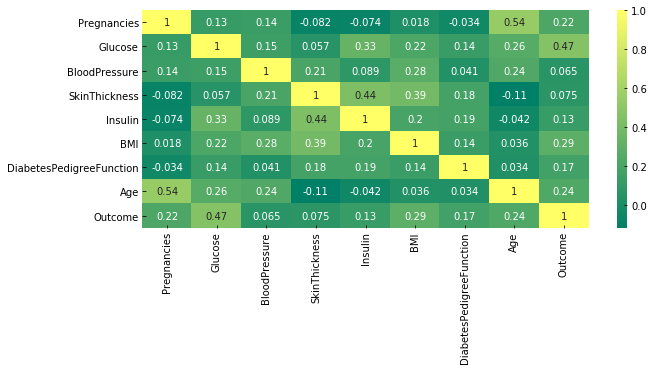

In [4]:
corr=dataset.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,annot=True,cmap='summer')
plt.show()

In [5]:
x=dataset.iloc[:,:-1].values # Independant variables
y=dataset.iloc[:,-1].values #dependant variables
x.shape,y.shape

((768, 8), (768,))

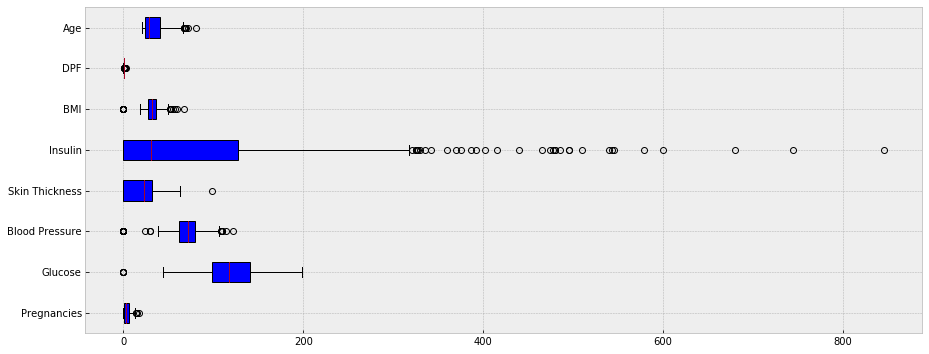

In [6]:
plt.figure(figsize=(15,6))
plt.boxplot(x,vert =False,labels=['Pregnancies','Glucose','Blood Pressure','Skin Thickness','Insulin','BMI','DPF','Age'],
           patch_artist=True)
plt.show()

In [7]:
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
sc=StandardScaler() #z-score
mms=MinMaxScaler() #(0-1)->normalisation

In [8]:
x_sc =sc.fit_transform(x)
x_norm=mms.fit_transform(x)

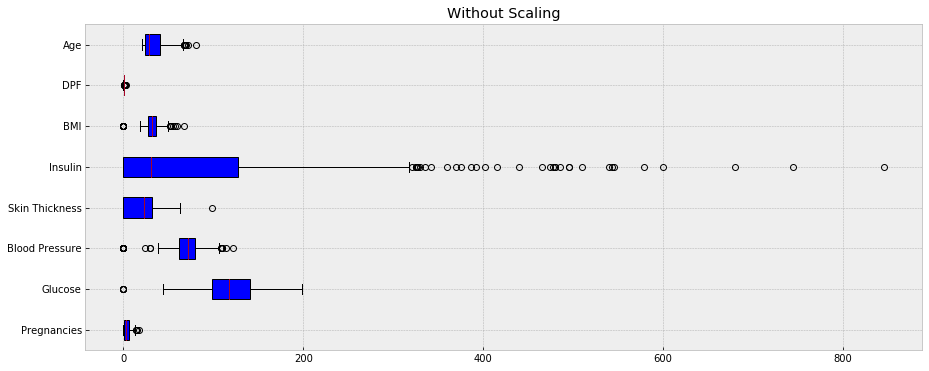

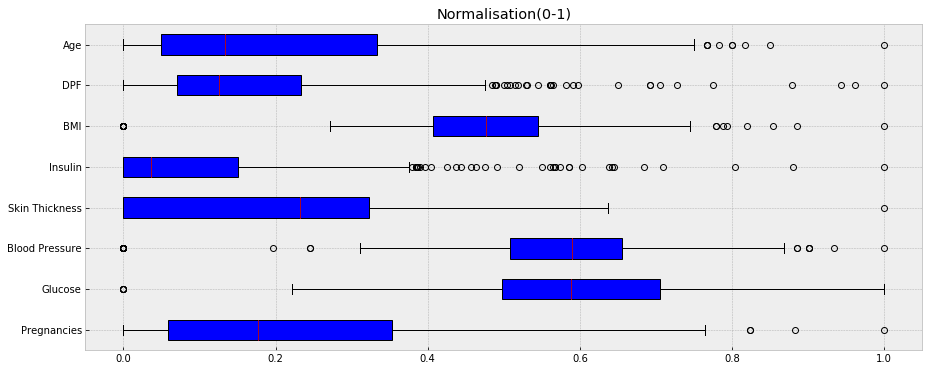

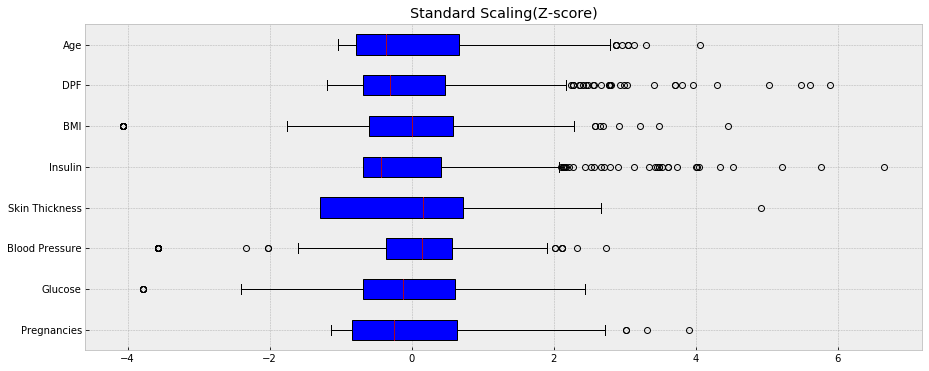

In [9]:
fig=plt.figure(figsize=(15,6))
plt.style.use('bmh')

# Without scaling
plt.boxplot(x,vert=False,labels=['Pregnancies','Glucose','Blood Pressure','Skin Thickness','Insulin','BMI','DPF','Age'],patch_artist=True)
plt.title('Without Scaling')
plt.show()

# Normalisation
fig=plt.figure(figsize=(15,6))
plt.boxplot(x_norm,vert=False,labels=['Pregnancies','Glucose','Blood Pressure','Skin Thickness','Insulin','BMI','DPF','Age'],patch_artist=True)
plt.title('Normalisation(0-1)')
plt.show()

# Standard scaling
fig=plt.figure(figsize=(15,6))
plt.boxplot(x_sc,vert=False,labels=['Pregnancies','Glucose','Blood Pressure','Skin Thickness','Insulin','BMI','DPF','Age'],patch_artist=True)
plt.title('Standard Scaling(Z-score)')
plt.show()



In [10]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

C:\Program Files\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((614, 8), (614,), (154, 8), (154,))

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
model_log= LogisticRegression(C=10.0) # class
model_knn= KNeighborsClassifier(n_neighbors=3)
model_svm= SVC(kernel='rbf')
model_dt= DecisionTreeClassifier()
model_rf= RandomForestClassifier(n_estimators=100)

In [13]:
model_log.fit(x_train,y_train)
model_knn.fit(x_train,y_train)
model_svm.fit(x_train,y_train)
model_dt.fit(x_train,y_train)
model_rf.fit(x_train,y_train)
print('Model trained successfully')

Model trained successfully


In [14]:
y_pred_log=model_log.predict(x_test)
y_pred_knn=model_knn.predict(x_test)
y_pred_svm=model_svm.predict(x_test)
y_pred_dt=model_dt.predict(x_test)
y_pred_rf=model_rf.predict(x_test)

In [15]:
print(y_pred_log)
print(y_pred_knn)
print(y_pred_svm)
print(y_pred_dt)
print(y_pred_rf)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]
[1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0
 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]
[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0]
[1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
cm_log= confusion_matrix(y_test,y_pred_log)
cm_knn= confusion_matrix(y_test,y_pred_knn)
cm_svm= confusion_matrix(y_test,y_pred_svm)
cm_dt= confusion_matrix(y_test,y_pred_dt)
cm_rf= confusion_matrix(y_test,y_pred_rf)

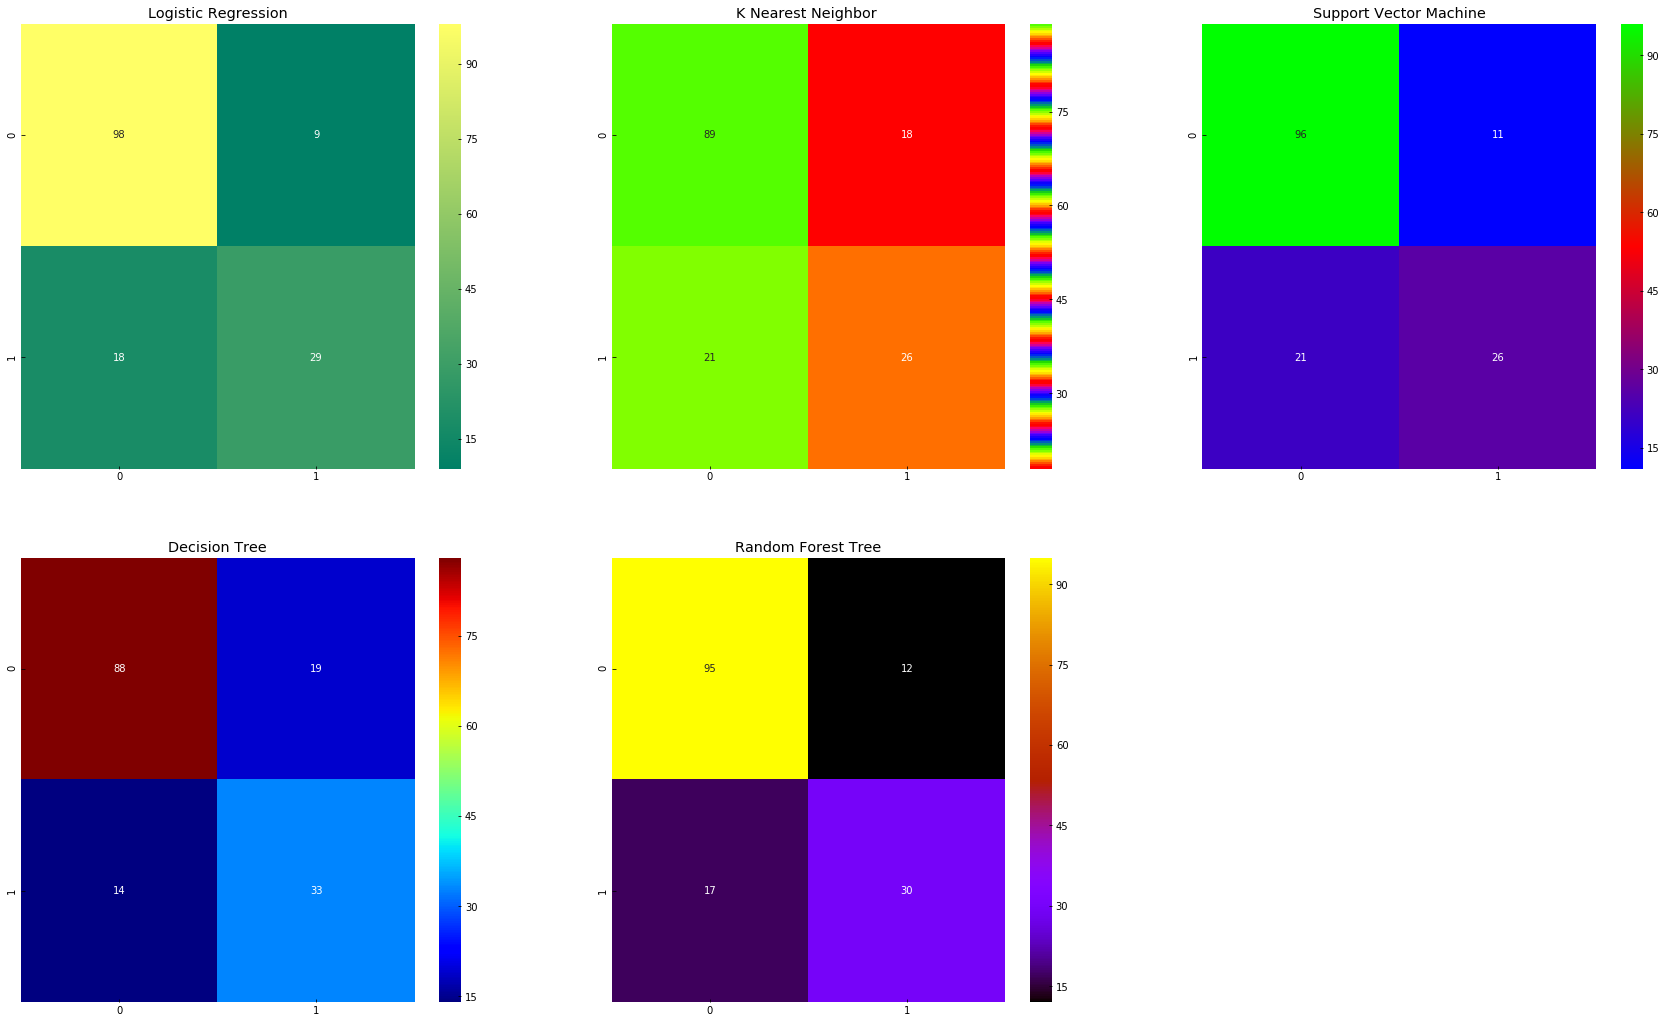

In [18]:
fig=plt.figure(figsize=(30,18))

plt.subplot(2,3,1)
sns.heatmap(cm_log,annot=True,cmap='summer')
plt.title('Logistic Regression')

plt.subplot(2,3,2)
sns.heatmap(cm_knn,annot=True,cmap='prism')
plt.title('K Nearest Neighbor ')

plt.subplot(2,3,3)
sns.heatmap(cm_svm,annot=True,cmap='brg',)
plt.title('Support Vector Machine')

plt.subplot(2,3,4)
sns.heatmap(cm_dt,annot=True,cmap='jet',)
plt.title('Decision Tree')

plt.subplot(2,3,5)
sns.heatmap(cm_rf,annot=True,cmap='gnuplot',)
plt.title('Random Forest Tree')
plt.show()

In [19]:
cr_log=classification_report(y_test,y_pred_log)
cr_knn=classification_report(y_test,y_pred_knn)
cr_svm=classification_report(y_test,y_pred_svm)
cr_dt=classification_report(y_test,y_pred_dt)
cr_rf=classification_report(y_test,y_pred_rf)

In [20]:
print("*"*20+'Logistic Regression'+"*"*20)
print(cr_log)

print("*"*20+'K Nearest Neighbor'+"*"*20)
print(cr_knn)

print("*"*20+'Support Vector Machine'+"*"*20)
print(cr_svm)

print("*"*20+'Decision tree'+"*"*20)
print(cr_dt)

print("*"*20+'Random Forest'+"*"*20)
print(cr_rf)

********************Logistic Regression********************
             precision    recall  f1-score   support

          0       0.84      0.92      0.88       107
          1       0.76      0.62      0.68        47

avg / total       0.82      0.82      0.82       154

********************K Nearest Neighbor********************
             precision    recall  f1-score   support

          0       0.81      0.83      0.82       107
          1       0.59      0.55      0.57        47

avg / total       0.74      0.75      0.74       154

********************Support Vector Machine********************
             precision    recall  f1-score   support

          0       0.82      0.90      0.86       107
          1       0.70      0.55      0.62        47

avg / total       0.78      0.79      0.78       154

********************Decision tree********************
             precision    recall  f1-score   support

          0       0.86      0.82      0.84       107
          1 